# **Identificación del problema**

A partir de los datos encontrados en Kaggle sobre la paradas que la policia ha realizado en Seattle a posibles sospechosos, queremos predecir si una persona será o no arrestada por la policia en función de sus características fisiológicas, de género así como también su intérvalo de edad, estar o no en posesión de una arma o otras características recogidas en el dataset.

#**Análisis del problema**

**Importar librerias y dataset**

In [0]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv('terry-stopsNaN.csv')

In [51]:
df.head()

Subject Age Group  Subject ID     GO / SC Num  Terry Stop ID  \
0           36 - 45         NaN  20150000088359          10012   
1           26 - 35         NaN  20150000087858          10068   
2           18 - 25         NaN  20150000001461          10103   
3           18 - 25         NaN  20150000001461          10104   
4           26 - 35         NaN  20150000103696          10207   

  Stop Resolution Weapon Type  Officer ID  Officer YOB Officer Gender  \
0               -        None        1735       1977.0              M   
1       GO Report        None        1561       1984.0              M   
2    Street Check        None        1539       1973.0              M   
3    Street Check        None        1539       1973.0              M   
4    Street Check        None        1539       1973.0              M   

  Officer Race ...      Reported Time  \
0        White ...   09:58:00.0000000   
1        White ...   19:08:00.0000000   
2        White ...   01:32:00.0000000   
3        White ...   01:35:00.0000000   
4        White ...   21:08:00.0000000   

                               Initial Call Type              Final Call Type  \
0                        WARRANT - FELONY PICKUP  --WARRANT SERVICES - FELONY   
1  THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)        --DISTURBANCE - OTHER   
2                                            NaN                          NaN   
3                                            NaN                          NaN   
4                              PROPERTY - DAMAGE       --PROPERTY DEST (DAMG)   

  Call Type Officer Squad Arrest Flag Frisk Flag Precinct Sector Beat  
0    ONVIEW           NaN           N          N     East      E   E2  
1       911           NaN           N          N     East      G   G3  
2       NaN           NaN           N          N      NaN    NaN  NaN  
3       NaN           NaN           N          N      NaN    NaN  NaN  
4       911           NaN           N          N     East      E   E2  

[5 rows x 23 columns]

#**Limpieza del dataset**

**Limpiamos el dataset**

**Subject ID**

Eliminamos la columna de Subject ID ya que no nos aporta información útil para nuestro estudio.

In [0]:
df = df.drop(labels = 'Subject ID', axis = 1)

**Categorical**

Ahora asignamos valores a las columnas Subject Age Group, Stop Resolution y Weapon Type.

In [0]:
def encode_label(df):
    #Label
    return df.astype('category').cat.codes

In [0]:
df['Subject Age Group'] = encode_label(df['Subject Age Group'])
df['Stop Resolution'] = encode_label(df['Stop Resolution'])
df['Weapon Type'] = encode_label(df['Weapon Type'])

**Officer Gender**

In [0]:
df['Officer Gender'] = df['Officer Gender'].map({'F': 1, 'M': 0})

In [56]:
df['Officer Gender'].value_counts()

0.0    23151
1.0     2886
Name: Officer Gender, dtype: int64

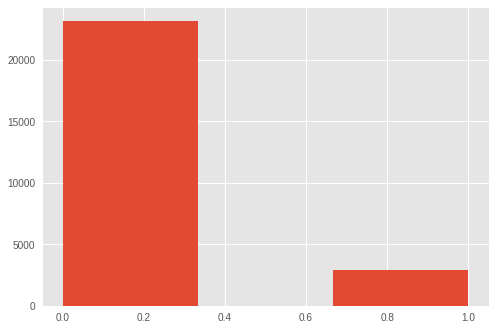

In [57]:
df['Officer Gender'].hist(bins=3)

**Reported Time**

La columna Reported Time representa la hora en que el policia ha comunicado a la central que iba a realizar alguna acción policial. Decidimos dividir el intérvalo en 6 franjas distintas.

In [0]:
df['Reported Time'] = df['Reported Time'].map(lambda k: k[0:2])
df.loc[(df['Reported Time'] >= '00') & (df['Reported Time'] < '04'), 'Reported Time'] = '0'
df.loc[(df['Reported Time'] >= '04') & (df['Reported Time'] < '08') & (df['Reported Time'] != '0'), 'Reported Time'] = '1'
df.loc[(df['Reported Time'] >= '08') & (df['Reported Time'] < '12') & (df['Reported Time'] != '0') & (df['Reported Time'] != '1'), 'Reported Time'] = '2'
df.loc[(df['Reported Time'] >= '12') & (df['Reported Time'] < '16') & (df['Reported Time'] != '0') & (df['Reported Time'] != '1') & (df['Reported Time'] != '2'), 'Reported Time'] = '3'
df.loc[(df['Reported Time'] >= '16') & (df['Reported Time'] < '20') & (df['Reported Time'] != '0') & (df['Reported Time'] != '1') & (df['Reported Time'] != '2')  & (df['Reported Time'] != '3'), 'Reported Time'] = '4'
df.loc[(df['Reported Time'] >= '20') & (df['Reported Time'] < '24') & (df['Reported Time'] != '0') & (df['Reported Time'] != '1') & (df['Reported Time'] != '2')  & (df['Reported Time'] != '3') & (df['Reported Time'] != '4'), 'Reported Time'] = '5'

In [59]:
df['Reported Time'].value_counts()

4    5901
0    5222
3    4379
5    4028
2    3504
1    3008
Name: Reported Time, dtype: int64

**Terry Stop ID**

Término policial que define un periodo corto de tiempo en que la policía está en su derecho de detener a una persona en base a una sospecha fundamentada. Para nuestro estudio no necesitaremos saber la ID de la detención, ya que no nos aporta nada.

In [60]:
df['Terry Stop ID'].value_counts()[0:10]

12282    1
38232    1
21824    1
23873    1
17730    1
19779    1
30020    1
25926    1
27975    1
13644    1
Name: Terry Stop ID, dtype: int64

In [0]:
df = df.drop(labels = 'Terry Stop ID', axis = 1)

**Arrest Flag**

Si la persona ha sido o no detenida

In [0]:
df['Arrest Flag'] = df['Arrest Flag'].map({'N': 0, 'Y': 1})

In [63]:
df['Arrest Flag'].value_counts()

0    20235
1     5807
Name: Arrest Flag, dtype: int64

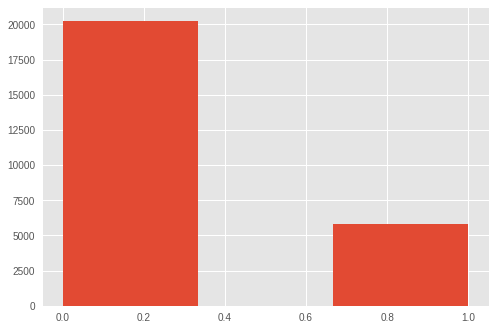

In [64]:
df['Arrest Flag'].hist(bins=3)

**GO / SC Num**

General Offense or Street Check number

In [65]:
df['GO / SC Num'].value_counts()[0:10]

20150000190790    16
20160000378750    16
20180000134604    14
20170000132836    13
20160000001326    12
20150000276851    11
20150000250267    10
20170000232779    10
20160000261120    10
20170000002238    10
Name: GO / SC Num, dtype: int64

In [0]:
df = df.drop(labels = 'GO / SC Num', axis = 1)

**Officer Race**

In [0]:
df['Officer Race'] = df['Officer Race'].map({'White': 0, 'Two or More Races': 1, 'Black or African American': 2,
       'Not Specified': 3, 'American Indian/Alaska Native': 4, 'Asian': 5,
       'Hispanic or Latino': 6, 'Nat Hawaiian/Oth Pac Islander': 7, 'Unknown':8})

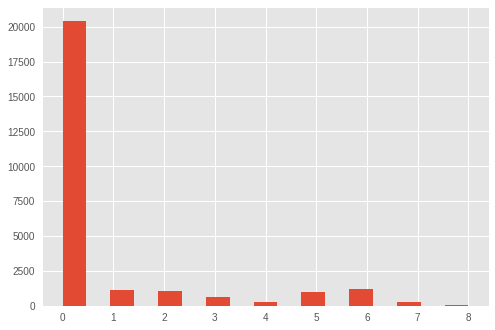

In [68]:
df['Officer Race'].hist(bins=17)

**Subject Precieved Race**

In [0]:
df['Subject Perceived Race'] = df['Subject Perceived Race'].map({'Black': 0, 'American Indian / Alaskan Native': 1, 'White': 2, '-': 3, 'Asian': 4,
       'Hispanic': 5, 'Unknown': 6, 'Multi-Racial': 7, 'Other': 8})

In [70]:
df['Subject Perceived Race'].value_counts()

2    12837
0     7999
5     1225
6     1194
1      843
4      793
7      669
3      376
8      106
Name: Subject Perceived Race, dtype: int64

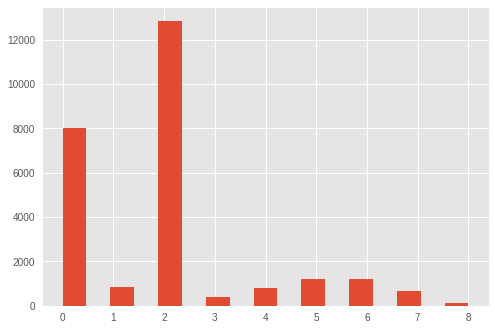

In [71]:
df['Subject Perceived Race'].hist(bins=17)

**Subject Percieved Gender**

In [0]:
df['Subject Perceived Gender'] = df['Subject Perceived Gender'].map({'Male': 0, 'Female': 1, '-': 2, 'Unable to Determine': 3})

In [73]:
df['Subject Perceived Gender'].value_counts()

0    20210
1     5385
3      262
2      185
Name: Subject Perceived Gender, dtype: int64

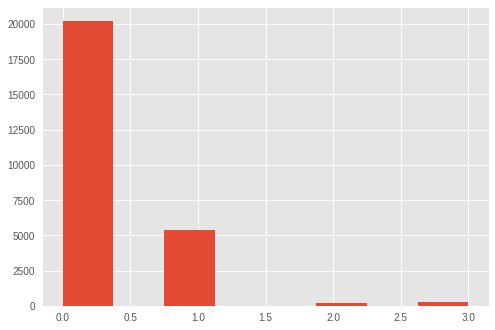

In [74]:
df['Subject Perceived Gender'].hist(bins=8)

**Frisk Flag**

Indicador de registro por parte del policia al sospecho.

In [75]:
df['Frisk Flag'].value_counts()

N    20102
Y     5571
-      369
Name: Frisk Flag, dtype: int64

Es curioso ver que en casi 26.000 "Terry Stops" solo se produjeron 5.000 cacheos a los sospechosos.

In [0]:
df['Frisk Flag'] = df['Frisk Flag'].replace('-', 'N')

In [0]:
df['Frisk Flag'] = df['Frisk Flag'].map({'N': 0, 'Y': 1})

**Precint Assign**

Zona de Seattle donde se ha producido el Terry Stop

In [0]:
df['Precinct'] = df['Precinct'].map({'North': 0, 'West': 1, 'East': 2, 'South': 3, 'Southwest': 4, 'Unknown': 5})

In [79]:
df['Precinct'].value_counts()

0.0    5298
1.0    4168
2.0    2661
3.0    2545
4.0    1482
5.0      34
Name: Precinct, dtype: int64

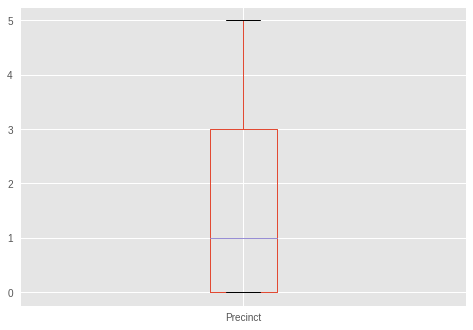

In [80]:
df.boxplot('Precinct')

**Call Type**

Eliminamos las columnas con  valores NaN.

In [81]:
df['Call Type'].isna().value_counts()

False    16188
True      9854
Name: Call Type, dtype: int64

In [0]:
df = df.dropna()

In [0]:
df['Call Type'] = df['Call Type'].map({'ONVIEW': 0, '911': 1, 'TELEPHONE OTHER, NOT 911': 2,
                                         'ALARM CALL (NOT POLICE ALARM)': 3})

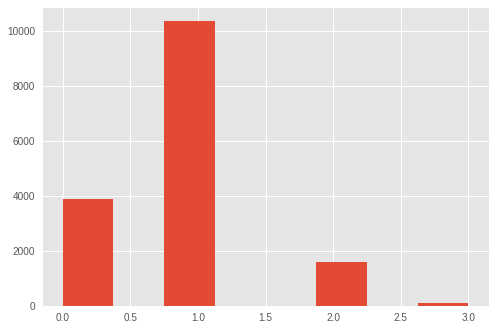

In [84]:
df['Call Type'].hist(bins=8)

**Initial and Finall call type**

In [0]:
df['Initial Call Type'] = encode_label(df['Initial Call Type'])
df['Final Call Type'] = encode_label(df['Final Call Type'])

**Officer Squad**

In [86]:
df['Officer Squad'].value_counts()[0:10]

TRAINING - FIELD TRAINING SQUAD          1843
WEST PCT 1ST W - DAVID/MARY               569
SOUTHWEST PCT 2ND W - FRANK               345
WEST PCT 2ND W - D/M RELIEF               340
NORTH PCT 3RD W - B/N RELIEF              322
WEST PCT 3RD W - DAVID                    312
NORTH PCT 1ST W - LINCOLN                 304
NORTH PCT 2ND W - NORA                    299
NORTH PCT 3RD W - BOY                     289
EAST PCT 1ST W - E/G RELIEF (CHARLIE)     289
Name: Officer Squad, dtype: int64

In [0]:
df['Officer Squad'] = encode_label(df['Officer Squad'])

**Sector**

In [0]:
df['Sector'] = encode_label(df['Sector'])

**Beat**

In [0]:
df['Beat'] = encode_label(df['Beat'])

**Reported Date**

In [0]:
df['Reported Date'] = df['Reported Date'].map(lambda k: k[0:4])

In [0]:
df.loc[(df['Reported Date'] == '2015'), 'Reported Date'] = '0'
df.loc[(df['Reported Date'] == '2016'), 'Reported Date'] = '1'
df.loc[(df['Reported Date'] == '2017'), 'Reported Date'] = '2'
df.loc[(df['Reported Date'] == '2018'), 'Reported Date'] = '3'

In [92]:
df.head()

Subject Age Group  Stop Resolution  Weapon Type  Officer ID  Officer YOB  \
20                  5                3            9        1803       1987.0   
21                  4                1            9        1264       1977.0   
22                  3                3            9         579       1968.0   
24                  3                1            8        1760       1975.0   
25                  6                1            9        1682       1985.0   

    Officer Gender  Officer Race  Subject Perceived Race  \
20             1.0             0                       0   
21             0.0             0                       5   
22             0.0             0                       2   
24             0.0             0                       5   
25             0.0             0                       2   

    Subject Perceived Gender Reported Date Reported Time  Initial Call Type  \
20                         0             0             2                 15   
21                         0             0             0                 76   
22                         0             0             2                128   
24                         0             0             0                 17   
25                         1             0             3                118   

    Final Call Type  Call Type  Officer Squad  Arrest Flag  Frisk Flag  \
20               43          1             63            0           0   
21              101          1             71            1           0   
22               88          1             40            0           0   
24               13          1            117            1           1   
25               94          1            103            1           0   

    Precinct  Sector  Beat  
20       3.0      13    37  
21       3.0      13    37  
22       0.0      17    50  
24       1.0       9    25  
25       1.0       4     9

#**Análisis del dataset**

In [0]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [0]:
X = df.drop('Arrest Flag', axis=1)

In [0]:
y = df['Arrest Flag']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

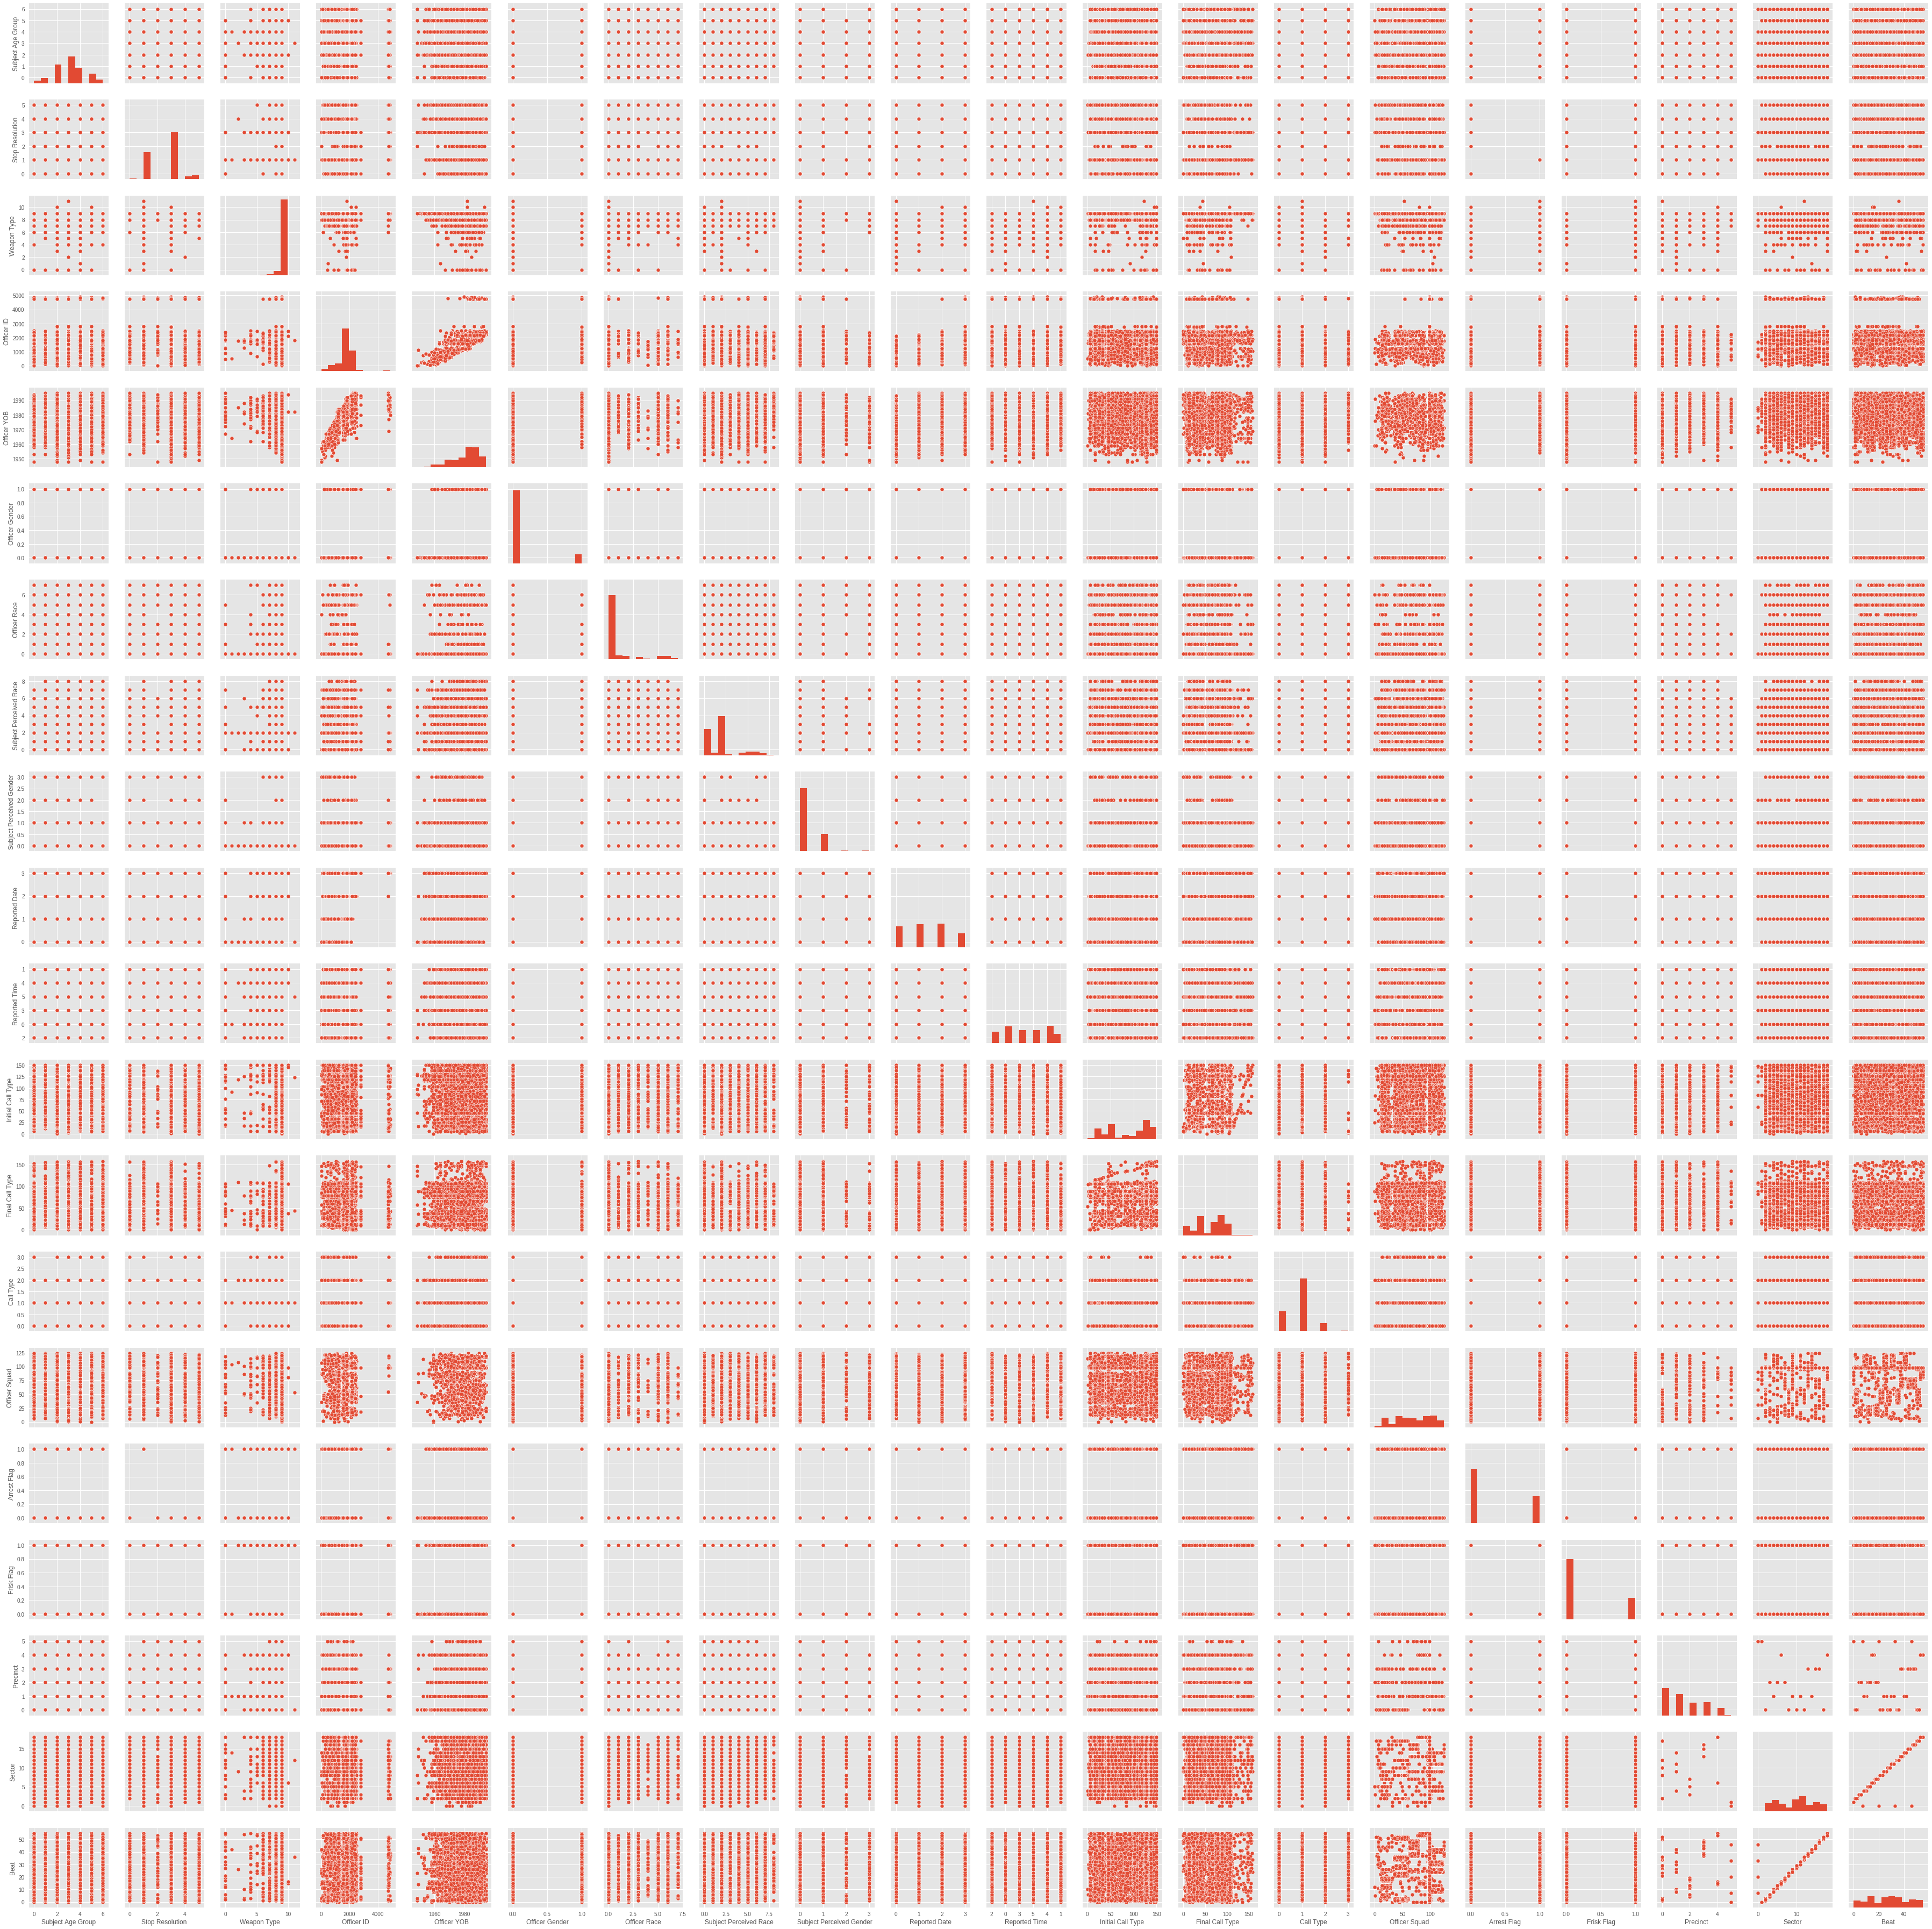

In [97]:
sns.pairplot(df)

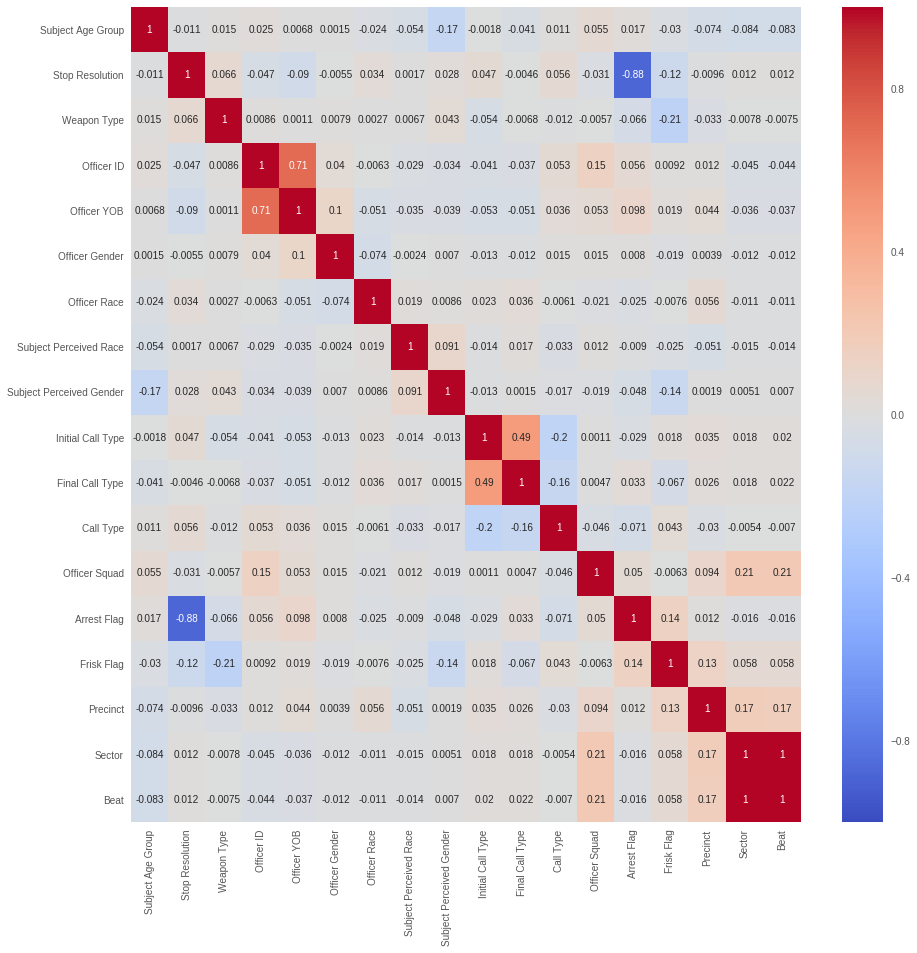

In [98]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True,ax = ax)
plt.savefig('cov.png',dpi = 900)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)

In [100]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
rfc.score(X_test, y_test)

1.0

In [0]:
from sklearn.model_selection import cross_val_score

In [103]:
cross_val_score(rfc, X, y, cv=5).mean()

1.0

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [106]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(15938, 9)

In [107]:
X_new

array([[5, 3, 1987.0, ..., 43, 63, 0],
       [4, 1, 1977.0, ..., 101, 71, 0],
       [3, 3, 1968.0, ..., 88, 40, 0],
       ...,
       [4, 1, 1983.0, ..., 82, 13, 1],
       [5, 3, 1975.0, ..., 94, 80, 0],
       [3, 3, 1982.0, ..., 88, 80, 0]], dtype=object)

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [109]:
scores = []
for rfc in classifiers:
    rfc.fit(X_train, y_train)
    cv_results = cross_validate(rfc, X_new[0:5260], y_test, cv=5, return_train_score=True)
    scores.append(np.mean(cv_results['test_score']))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [110]:
scores

[0.5728187759450157,
 0.6661597557701697,
 0.5606520165131735,
 0.6307927451032757,
 0.6667299167431819,
 0.6621682609973681,
 0.6659698222469028,
 0.6661597557701697,
 0.663499783031426,
 0.6661597557701697]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


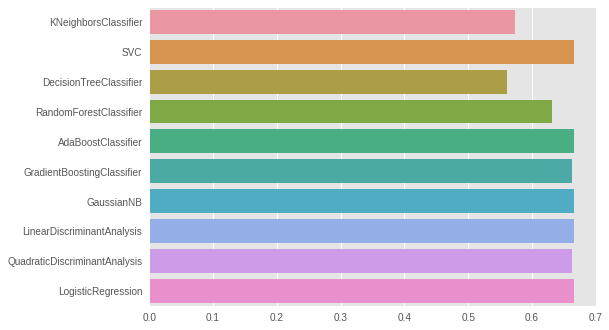

In [111]:
sns.barplot(y=[n.__class__.__name__  for n in classifiers], x=scores, orient='h')

#**Selección de características**

In [0]:
 from sklearn.decomposition import PCA

In [113]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
y_variance = pca.explained_variance_ratio_

In [115]:
pd.DataFrame(pca.components_, columns=X.columns)

Subject Age Group  Stop Resolution  Weapon Type  Officer ID  Officer YOB  \
0            0.000061        -0.000099     0.000009    0.999892     0.011050   
1            0.000337        -0.000810     0.000515   -0.004033     0.004855   
2           -0.001875         0.000860     0.000107    0.008262     0.014307   
3           -0.002298        -0.001860     0.000757    0.000537    -0.002532   
4            0.008677        -0.001282     0.000172   -0.002388    -0.007030   
5            0.002628         0.015954     0.000845    0.011154    -0.999250   
6           -0.076642         0.008713     0.001870    0.000027     0.010751   
7            0.043504         0.015379    -0.002157   -0.000041     0.008053   
8           -0.083589         0.026799     0.001648   -0.000263     0.016413   
9           -0.746120        -0.008013    -0.016191    0.000135    -0.013049   
10           0.645580        -0.090588    -0.010457   -0.000008    -0.008330   
11           0.061281         0.985312     0.044204   -0.000007     0.013034   
12          -0.049923         0.109631     0.011197   -0.000720     0.014274   
13          -0.010635         0.014034    -0.577414   -0.000059     0.000641   
14          -0.003207         0.075412    -0.694799    0.000046    -0.000457   
15           0.068064        -0.012023    -0.329054    0.000015     0.001335   
16           0.022442         0.036976     0.255141   -0.000017     0.001203   
17          -0.013351        -0.013537    -0.089503   -0.000012     0.000374   
18           0.000225         0.000146     0.000324    0.000030    -0.005179   

    Officer Gender  Officer Race  Subject Perceived Race  \
0         0.000022     -0.000020               -0.000098   
1         0.000076     -0.001026                0.000284   
2        -0.000075      0.001142               -0.000916   
3        -0.000038      0.001424                0.002108   
4         0.000263      0.000742                0.002605   
5        -0.005549      0.020836                0.006343   
6        -0.001835      0.228256                0.957183   
7        -0.004255      0.559921               -0.248122   
8        -0.011798      0.786791               -0.098010   
9         0.001846     -0.109813               -0.014324   
10       -0.001117     -0.033928                0.105141   
11        0.003806     -0.034582                0.004671   
12       -0.010566     -0.018434                0.023940   
13       -0.001537      0.001680                0.015511   
14       -0.014573      0.000536               -0.001684   
15        0.012191      0.000048               -0.021526   
16       -0.024672      0.002177               -0.003595   
17        0.011658      0.001485                0.001768   
18        0.999285      0.012356                0.000110   

    Subject Perceived Gender  Reported Date  Reported Time  Initial Call Type  \
0                  -0.000032       0.000563      -0.000123          -0.003445   
1                   0.000122      -0.000783      -0.001561          -0.889648   
2                   0.000201       0.001850      -0.000059           0.017142   
3                   0.000236       0.001175       0.000055          -0.456279   
4                  -0.000322      -0.000843      -0.002315           0.003051   
5                   0.001861       0.012060      -0.000616          -0.002988   
6                   0.028101      -0.028762       0.152345           0.000990   
7                  -0.009548       0.015324       0.772495          -0.001676   
8                   0.004731       0.020310      -0.601976           0.000523   
9                   0.052166       0.005662      -0.017436          -0.000016   
10                 -0.047288       0.092148      -0.129837          -0.000727   
11                  0.008835      -0.103079      -0.010897          -0.001427   
12                  0.017585       0.989291       0.015957          -0.000194   
13                 -0.185606       0.014805      -0.004391          

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


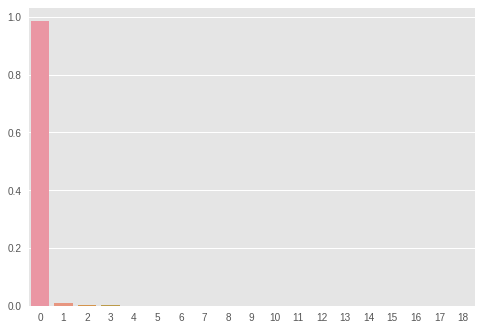

In [0]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)

#**Análisis de componentes principales**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
n_features = df.shape[1]
clf = RandomForestClassifier()
feature_score = []
for i in range(n_features):
    X_feature= np.reshape(df.iloc[:,i:i+1],-1,1)
    scores = cross_val_score(clf, X_feature, y)
    feature_score.append(scores.mean())
    print('%40s        %g' % (df.columns[i], scores.mean()))

                       Subject Age Group        0.669093
                         Stop Resolution        1
                             Weapon Type        0.669281
                              Officer ID        0.662191
                             Officer YOB        0.668904
                          Officer Gender        0.669093
                            Officer Race        0.669093
                  Subject Perceived Race        0.669093
                Subject Perceived Gender        0.669093
                           Reported Date        0.669093
                           Reported Time        0.669093
                       Initial Call Type        0.681641
                         Final Call Type        0.76716
                               Call Type        0.669093
                           Officer Squad        0.66903
                             Arrest Flag        1
                              Frisk Flag        0.669093
                                Precinct       

In [118]:
feature_score

[0.6690927317400602,
 1.0,
 0.6692809965629505,
 0.662190770894608,
 0.668904478728012,
 0.6690927317400602,
 0.6690927317400602,
 0.6690927317400602,
 0.6690927317400602,
 0.6690927317400602,
 0.6690927317400602,
 0.6816411727278018,
 0.7671603267956071,
 0.6690927317400602,
 0.6690295791674132,
 1.0,
 0.6690927317400602,
 0.6689672533537122,
 0.6690299925468862,
 0.6692181983155661]

In [0]:
pca = PCA(n_components = 4)
pca.fit(X)
X_pca = pca.transform(X)
y_variance = pca.explained_variance_ratio_

In [0]:
df_pca = pd.DataFrame(X_pca)

In [121]:
df_pca.head()

0          1          2          3
0    78.487901  73.781936   4.122749  14.395482
1  -460.831997  -4.910361  -7.824555  37.789658
2 -1146.294239 -42.305648  16.139587   2.681056
3    35.901537  85.352026 -47.746341 -14.079730
4   -42.603765 -40.833546 -30.943787  11.986621

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [0]:
X = df_pca

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [125]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
rfc.score(X_test, y_test)

0.7842205323193916

In [0]:
from sklearn.model_selection import cross_val_score

In [128]:
cross_val_score(rfc, X, y, cv=5).mean()

0.7902496099229612

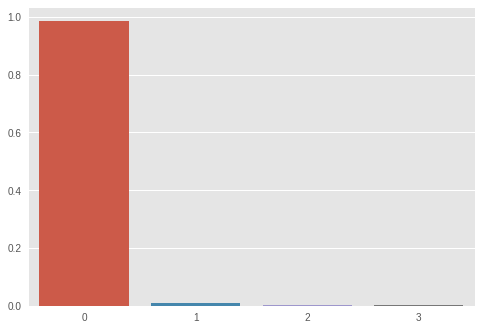

In [0]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)

#**Modelos ML**

**Random Forest**

Random forest se encuentra en el siguiente enlace: [click aquí](https://colab.research.google.com/drive/1vG0f4cDjhdNbyrEL09VdZO2UZ74uRhqO#scrollTo=WliyxBNe_EDQ&line=2&uniqifier=1)

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
LR = LogisticRegression()

In [135]:
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
score = LR.score(X_test, y_test)
print(score)

0.6576045627376426


#**Análisis de las predicciones obtenidas**


Haciendo el modelo de RandomForest sin reducir la dimensionalidad del dataset hemos obtenido una accuracy muy proxima a 1, indiferentemente de si utilizamos cross-validation o no. En cambio cuando hemos reducido la dimensionalidad con PCA se puede ver que la accuracy baja hasta un 0.78 aproximadamente, y eso es debido a que al reducir la cantidad de datos con la que trabaja implica que también se reduce la precisión de la solución.

#**Clustering**

In [137]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import keras

Using TensorFlow backend.


In [0]:
import random
import sys
random_states = [random.randint(0, sys.maxsize) for i in range(5)]

In [139]:
random_states

[8683018802189668084,
 9116816075678834182,
 2280717362367422515,
 8831520870967506181,
 8440949744803107606]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)

**Calinski-Harabaz**

In [0]:
import numpy as np
from sklearn.metrics import calinski_harabaz_score
from sklearn.cluster import KMeans

In [0]:
calinskis = []

for k in range(2,20):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_pca)
  c = calinski_harabaz_score(X_pca, kmeans.labels_)
  calinskis.append(c)

In [143]:
calinski_harabaz_score(X_pca, kmeans.labels_)

65771.93373118939

In [0]:
b = np.array(list(range(2,20)))

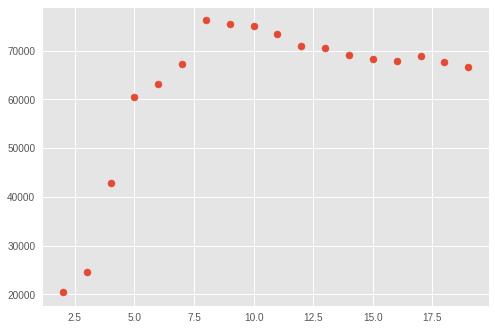

In [0]:
plt.scatter(x=b, y=calinskis)

**Kmeans**

In [145]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [146]:
kmeans.labels_

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [147]:
kmeans.inertia_

1197718627.6788993

In [0]:
df['KMEANS'] = kmeans.labels_

In [150]:
df.head()

Subject Age Group  Stop Resolution  Weapon Type  Officer ID  Officer YOB  \
20                  5                3            9        1803       1987.0   
21                  4                1            9        1264       1977.0   
22                  3                3            9         579       1968.0   
24                  3                1            8        1760       1975.0   
25                  6                1            9        1682       1985.0   

    Officer Gender  Officer Race  Subject Perceived Race  \
20             1.0             0                       0   
21             0.0             0                       5   
22             0.0             0                       2   
24             0.0             0                       5   
25             0.0             0                       2   

    Subject Perceived Gender Reported Date   ...   Initial Call Type  \
20                         0             0   ...                  15   
21                         0             0   ...                  76   
22                         0             0   ...                 128   
24                         0             0   ...                  17   
25                         1             0   ...                 118   

    Final Call Type  Call Type  Officer Squad  Arrest Flag  Frisk Flag  \
20               43          1             63            0           0   
21              101          1             71            1           0   
22               88          1             40            0           0   
24               13          1            117            1           1   
25               94          1            103            1           0   

    Precinct  Sector  Beat  KMEANS  
20       3.0      13    37       1  
21       3.0      13    37       0  
22       0.0      17    50       0  
24       1.0       9    25       1  
25       1.0       4     9       1  

[5 rows x 21 columns]

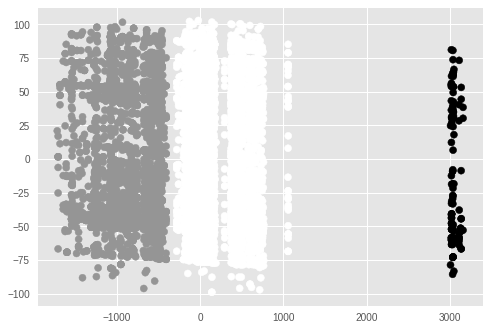

In [0]:
plt.scatter(x=df_pca[0], y=df_pca[1], c=kmeans.labels_*2 )

#**SVM**

**Kernel Lineal**

In [0]:
X = df_pca
y = df['Arrest Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [0]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)

In [0]:
score = cross_val_score(lsvc, X,y, cv=5, n_jobs=1).mean()

In [159]:
print(score)

0.669155440875663


**Kernel RBF**

In [0]:
svc = SVC(kernel='rbf')  
classifier = svc.fit(X_train, y_train) 
score = cross_val_score(classifier, X,y, cv=5, n_jobs=1).mean()

In [161]:
print(score)

0.7366660208046338


#**Neural Network**

In [0]:
from keras import optimizers

In [0]:
from keras.layers import Dropout
accuracies = []
losses = []
model = Sequential()
model.add(Dense(20, kernel_initializer='glorot_normal', input_dim=X_train.shape[1],  activation='relu'))  
model.add(Dropout(0.1))
model.add(Dense(20, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.1, decay = 1e-6, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

loss, acc = model.evaluate(X_test, y_test, batch_size=32)

accuracies.append(acc)
losses.append(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 10678 samples, validate on 5260 samples
Epoch 1/100
10678/10678 [==============================] - 3s 325us/step - loss: 5.3163 - acc: 0.6702 - val_loss: 5.3747 - val_acc: 0.6665
Epoch 2/100
10678/10678 [==============================] - 1s 130us/step - loss: 5.3118 - acc: 0.6704 - val_loss: 5.3747 - val_acc: 0.6665
Epoch 3/100
10678/10678 [==============================] - 2s 145us/step - loss: 5.3148 - acc: 0.6703 - val_loss: 5.3747 - val_acc: 0.6665
Epoch 4/100
10678/10678 [==============================] - 2s 150us/step - loss: 5.3148 - acc: 0.6703 - val_loss: 5.3747 - val_acc: 0.6665
Epoch 5/100
10678/10678 [==============================] - 2s 143us/step - loss: 5.3163 - acc: 0.6702 - val_loss: 5.3747 - val_acc: 0.6665
Epoch 6/100
10678/106